## Smart Agricultural Production Optimizing Engine

About the data.

Nitrogen is one of chemical elements that become a part of amino acids. Plants synthesize nitrogen from soils along with other primary elements and turn them into amino acids. These chemical compounds are utilized by plants to increase the production and quality of crops.

Phosphorus plays a major role in the growth of new tissue and division of cells. Plants perform complex energy transmissions, a function that requires phosphorus.

Potassium is a paramount macro-element for overall survival of living things. It is an abundant mineral macronutrient present in both plant and animals tissues. It is necessary for the proper functionality of all living cells.

Temperature: Germination is a miraculous event that involves a number of factors that include air, water, light, and, of course, temperature. Germination increases in higher temperatures – up to a point. Once the seeds reach optimum temperatures, which depends on the plant, germination begins to decline.

The pH range 5.5–6.5 is optimal for plant growth as the availability of nutrients is optimal.

Besides disease, rainfall can also determine how fast a crop will grow from seed, including when it will be ready for harvesting. A good balance of rain and proper irrigation can lead to , which can cut down on germination time and the length between seeding and harvest.

__Problem Statement__

To recommend the crop for the suitable soil.This will be very useful in crop production (Agriculture).

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd

from numpy import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Import all required Libraries:

import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")
import six
import sys
sys.modules['sklearn.externals.six'] = six
from mlxtend.classifier import StackingClassifier
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression


In [3]:
dataset= pd.read_csv("/content/drive/MyDrive/DATA/Crop_recommendation.csv")

In [4]:
dataset.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
dataset['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [7]:
dataset.describe(include='all')

,N,P,K,temperature,humidity,ph,rainfall,label
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rice
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,NaN
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,NaN
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,NaN
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,NaN
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,NaN
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,NaN


In [8]:
# duplicate
len(dataset[dataset.duplicated()])

0

In [9]:
dataset.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

### Exploratory Data Analysis

In [10]:
numeric_features = dataset.describe().columns
numeric_features

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'], dtype='object')

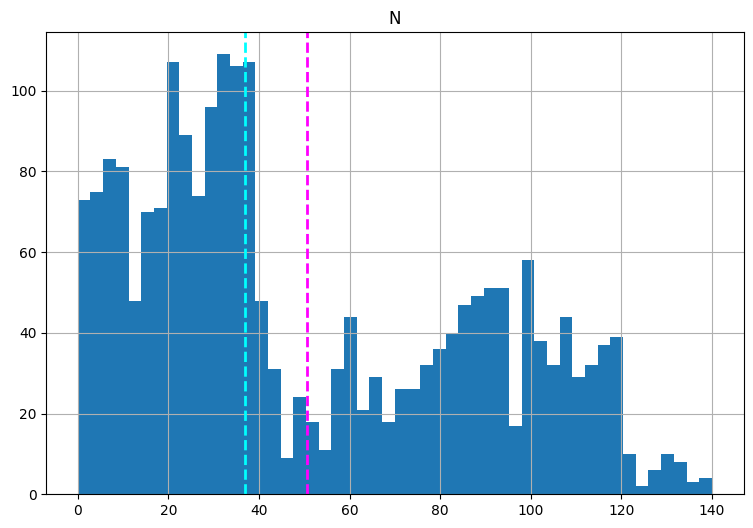

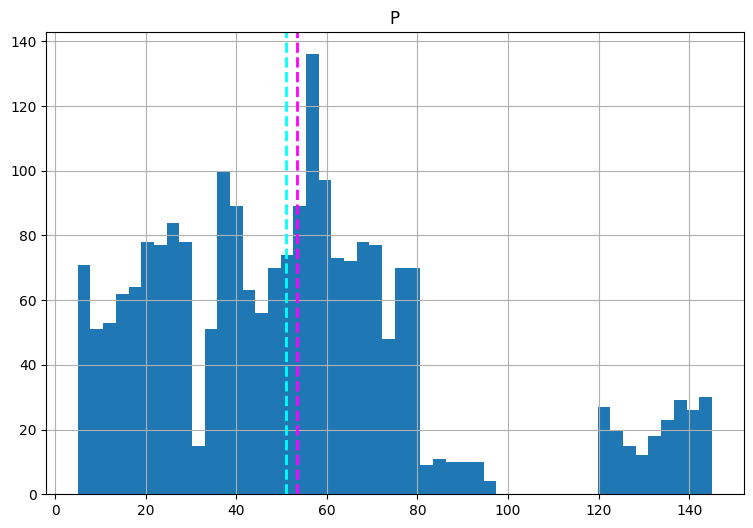

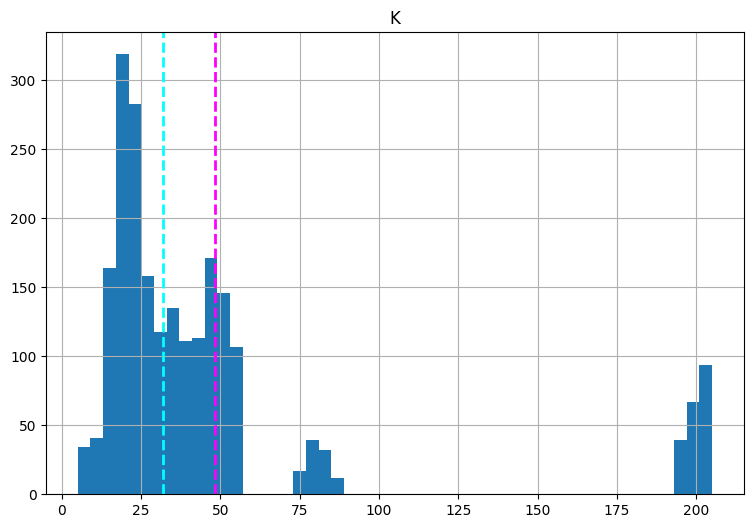

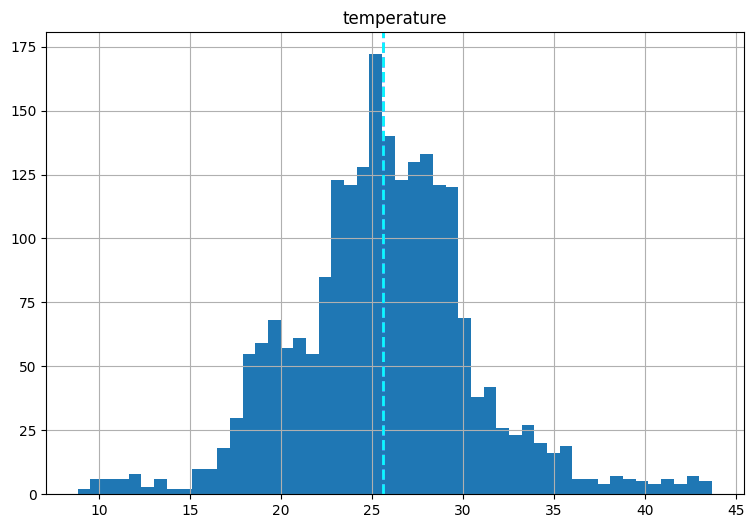

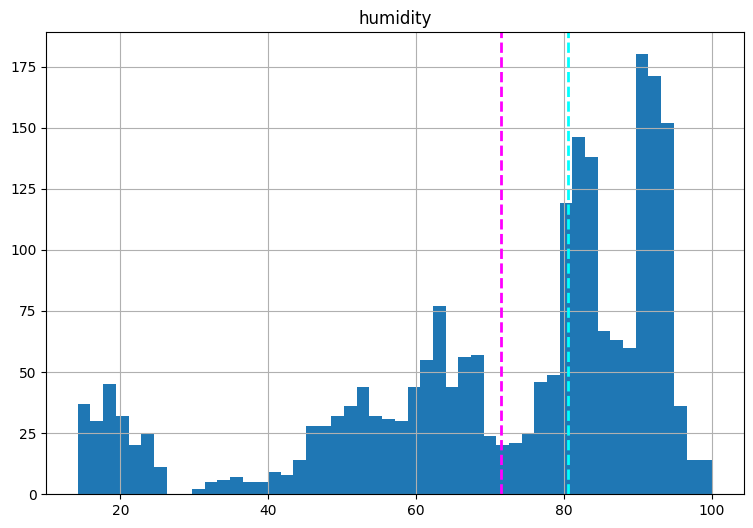

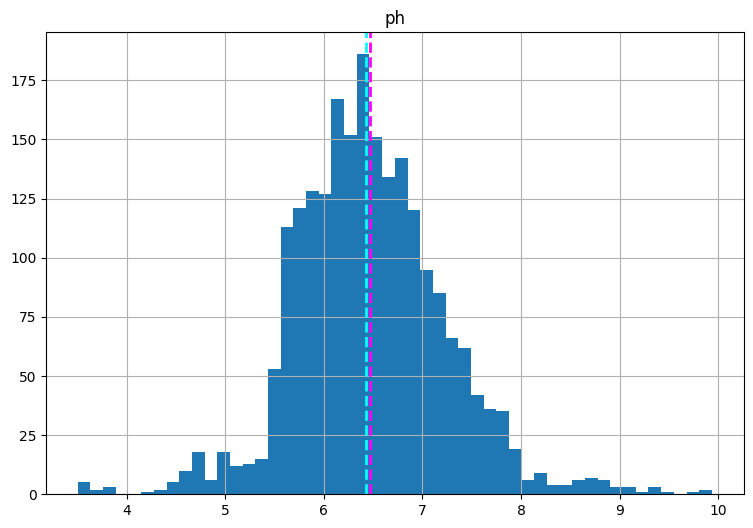

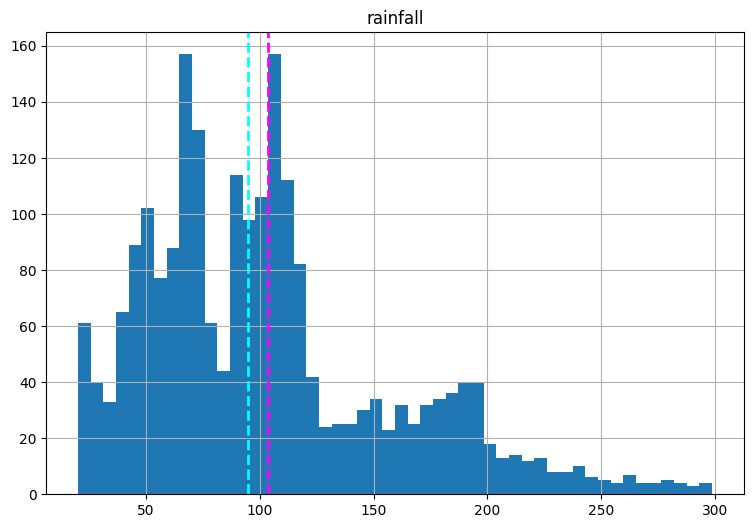

In [11]:
#@title Default title text
# plot a bar plot for each numerical feature count

for col in numeric_features[:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = dataset[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

## Outerlier detection using graphs

In [12]:
crops = dataset['label'].unique()
print(len(crops))
print(crops)
print(pd.value_counts(dataset['label']))

22
['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64


In [13]:
# Filtering each unique label and store it in a list df2 for to plot the box plot

df2=[]
for i in crops:
    df2.append(dataset[dataset['label'] == i])
df2[1].head()

,N,P,K,temperature,humidity,ph,rainfall,label
100,71,54,16,22.613600,63.690706,5.749914,87.759539,maize
101,61,44,17,26.100184,71.574769,6.931757,102.266244,maize
102,80,43,16,23.558821,71.593514,6.657965,66.719955,maize
103,73,58,21,19.972160,57.682729,6.596061,60.651715,maize
104,61,38,20,18.478913,62.695039,5.970458,65.438354,maize


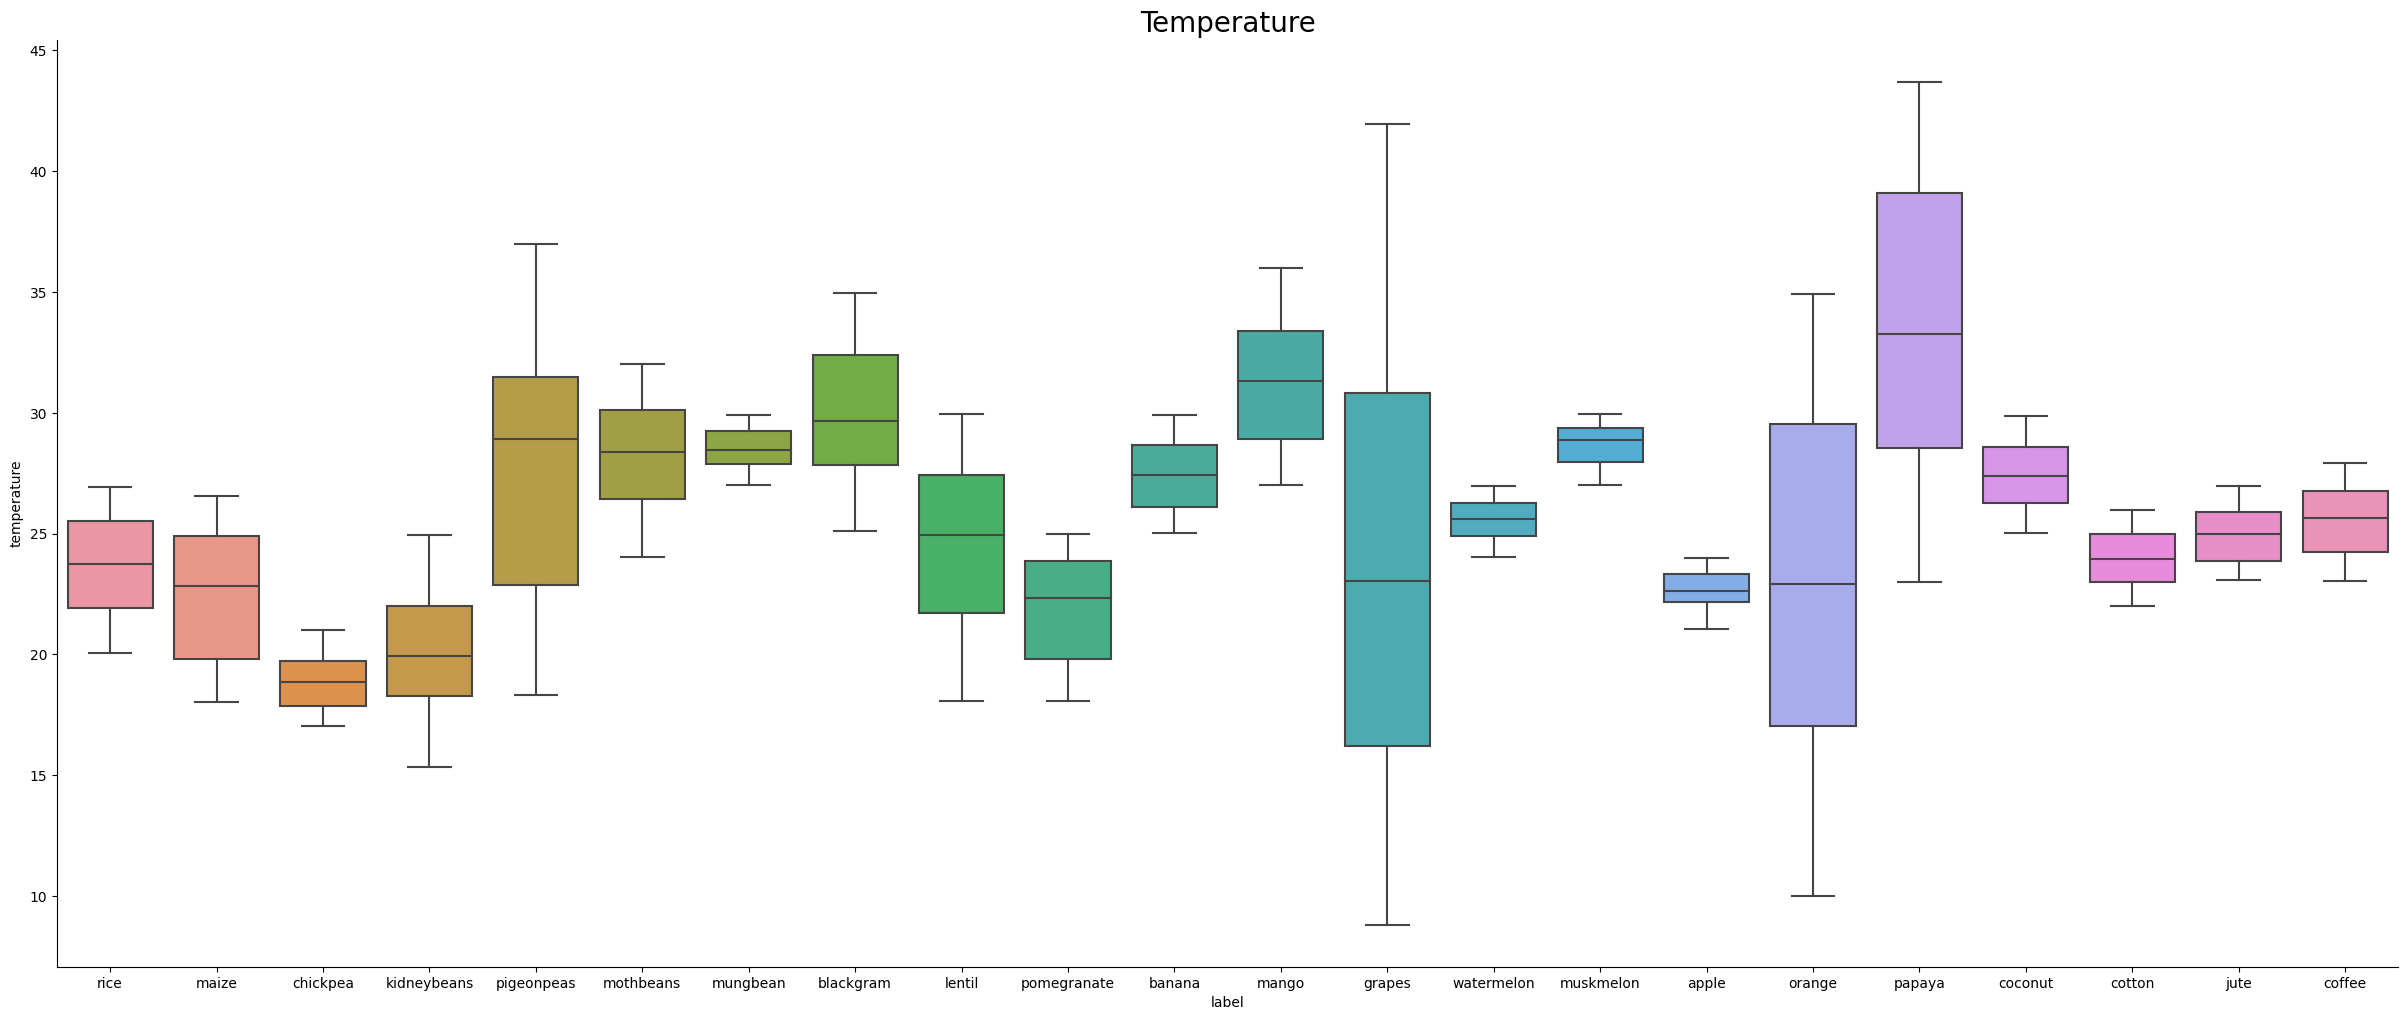

In [14]:
sns.catplot(data=dataset, x='label', y='temperature', kind='box', height=10, aspect=20/8.27)
# plt.xticks(rotation='vertical')
plt.title("Temperature", size=20)
plt.show()

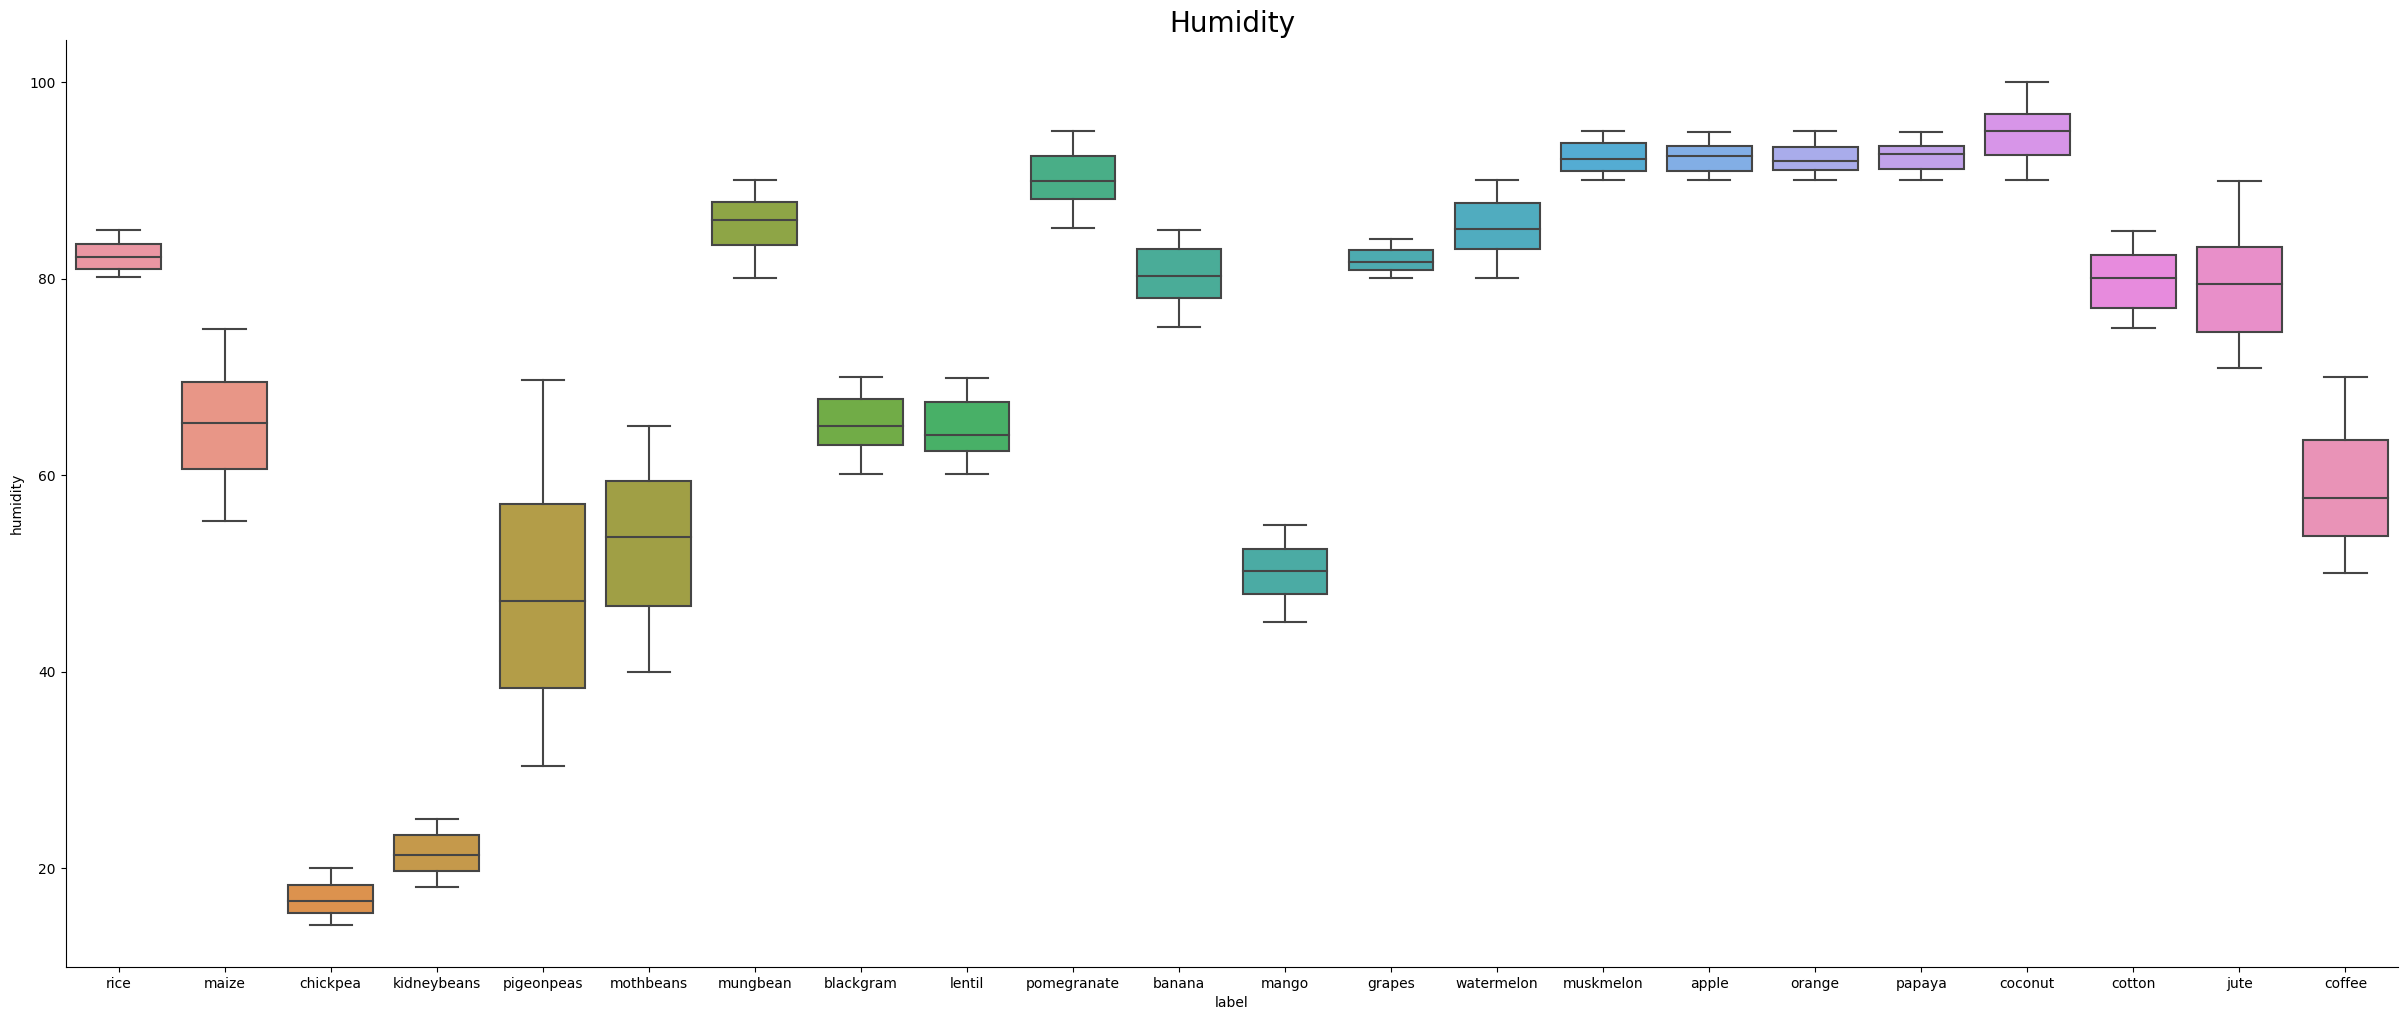

In [15]:
sns.catplot(data=dataset, x='label', y='humidity', kind='box', height=10, aspect=20/8.27)
# plt.xticks(rotation='vertical')
plt.title("Humidity", size=20)
plt.show()

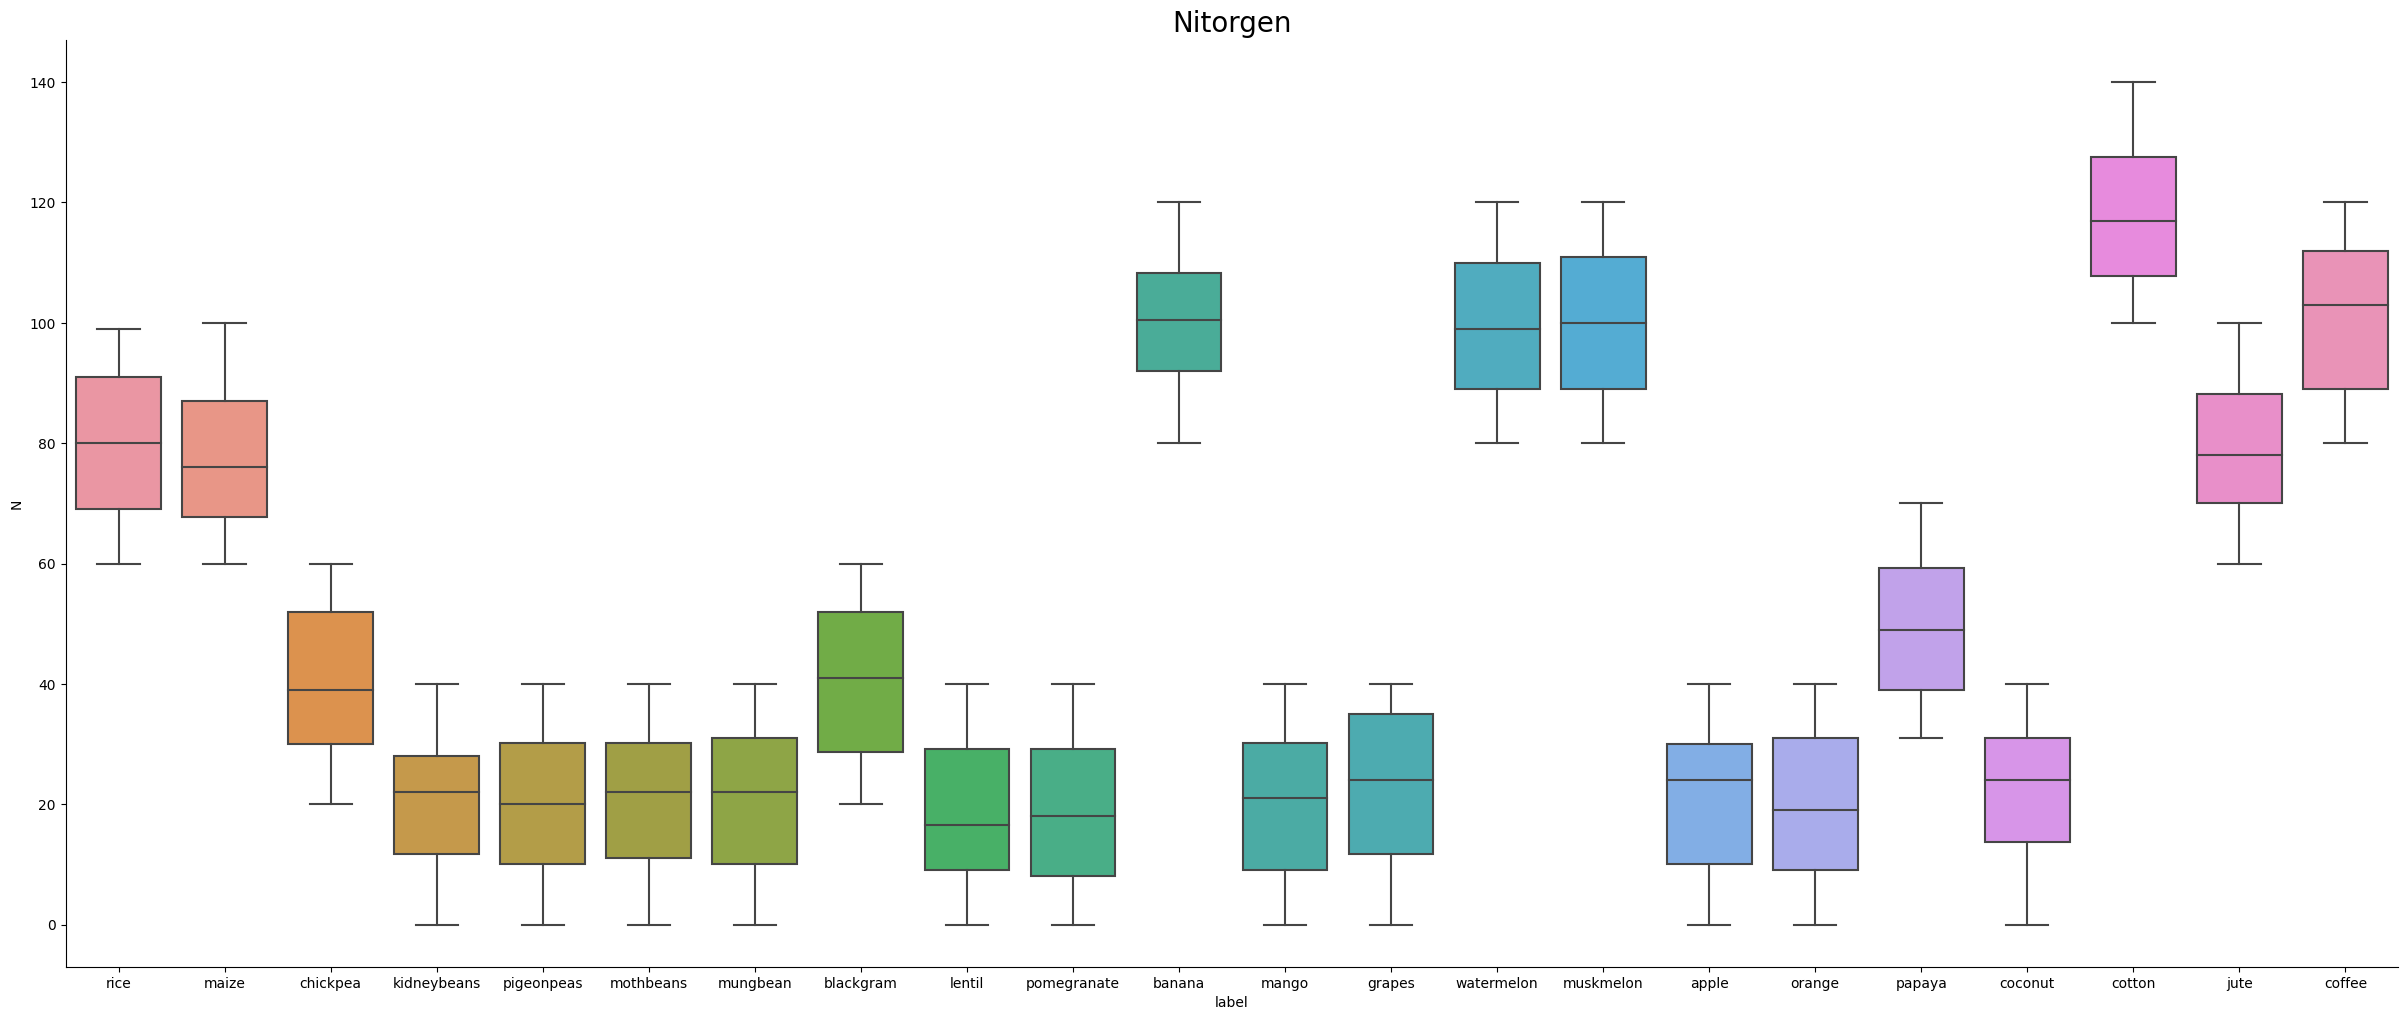

In [16]:
sns.catplot(data=dataset, x='label', y='N', kind='box', height=10, aspect=20/8.27)
# plt.xticks(rotation='vertical')
plt.title("Nitorgen", size=20)
plt.show()

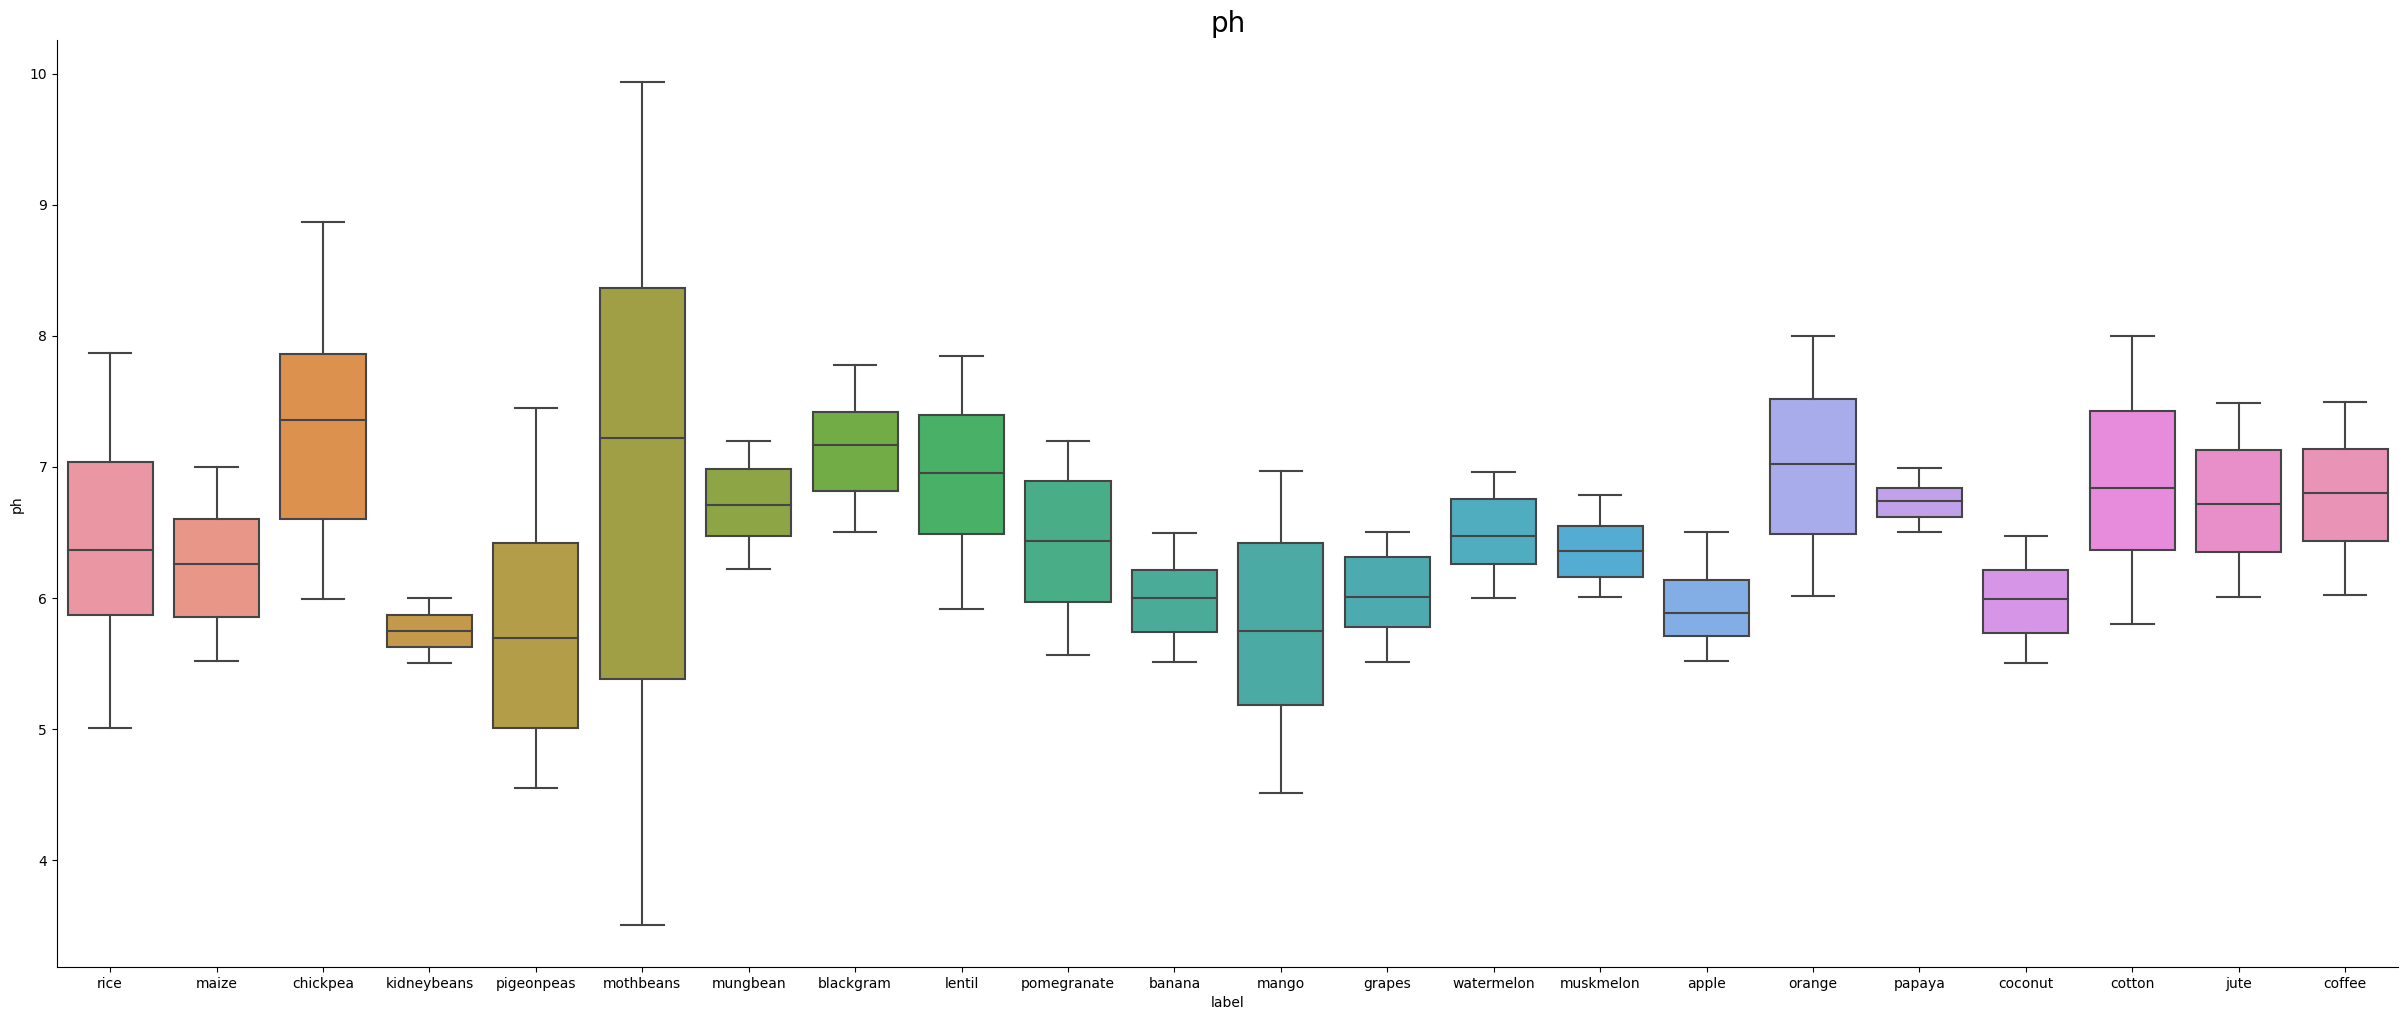

In [17]:
sns.catplot(data=dataset, x='label', y='ph', kind='box', height=10, aspect=20/8.27)
# plt.xticks(rotation='vertical')
plt.title("ph",size=20)
plt.show()

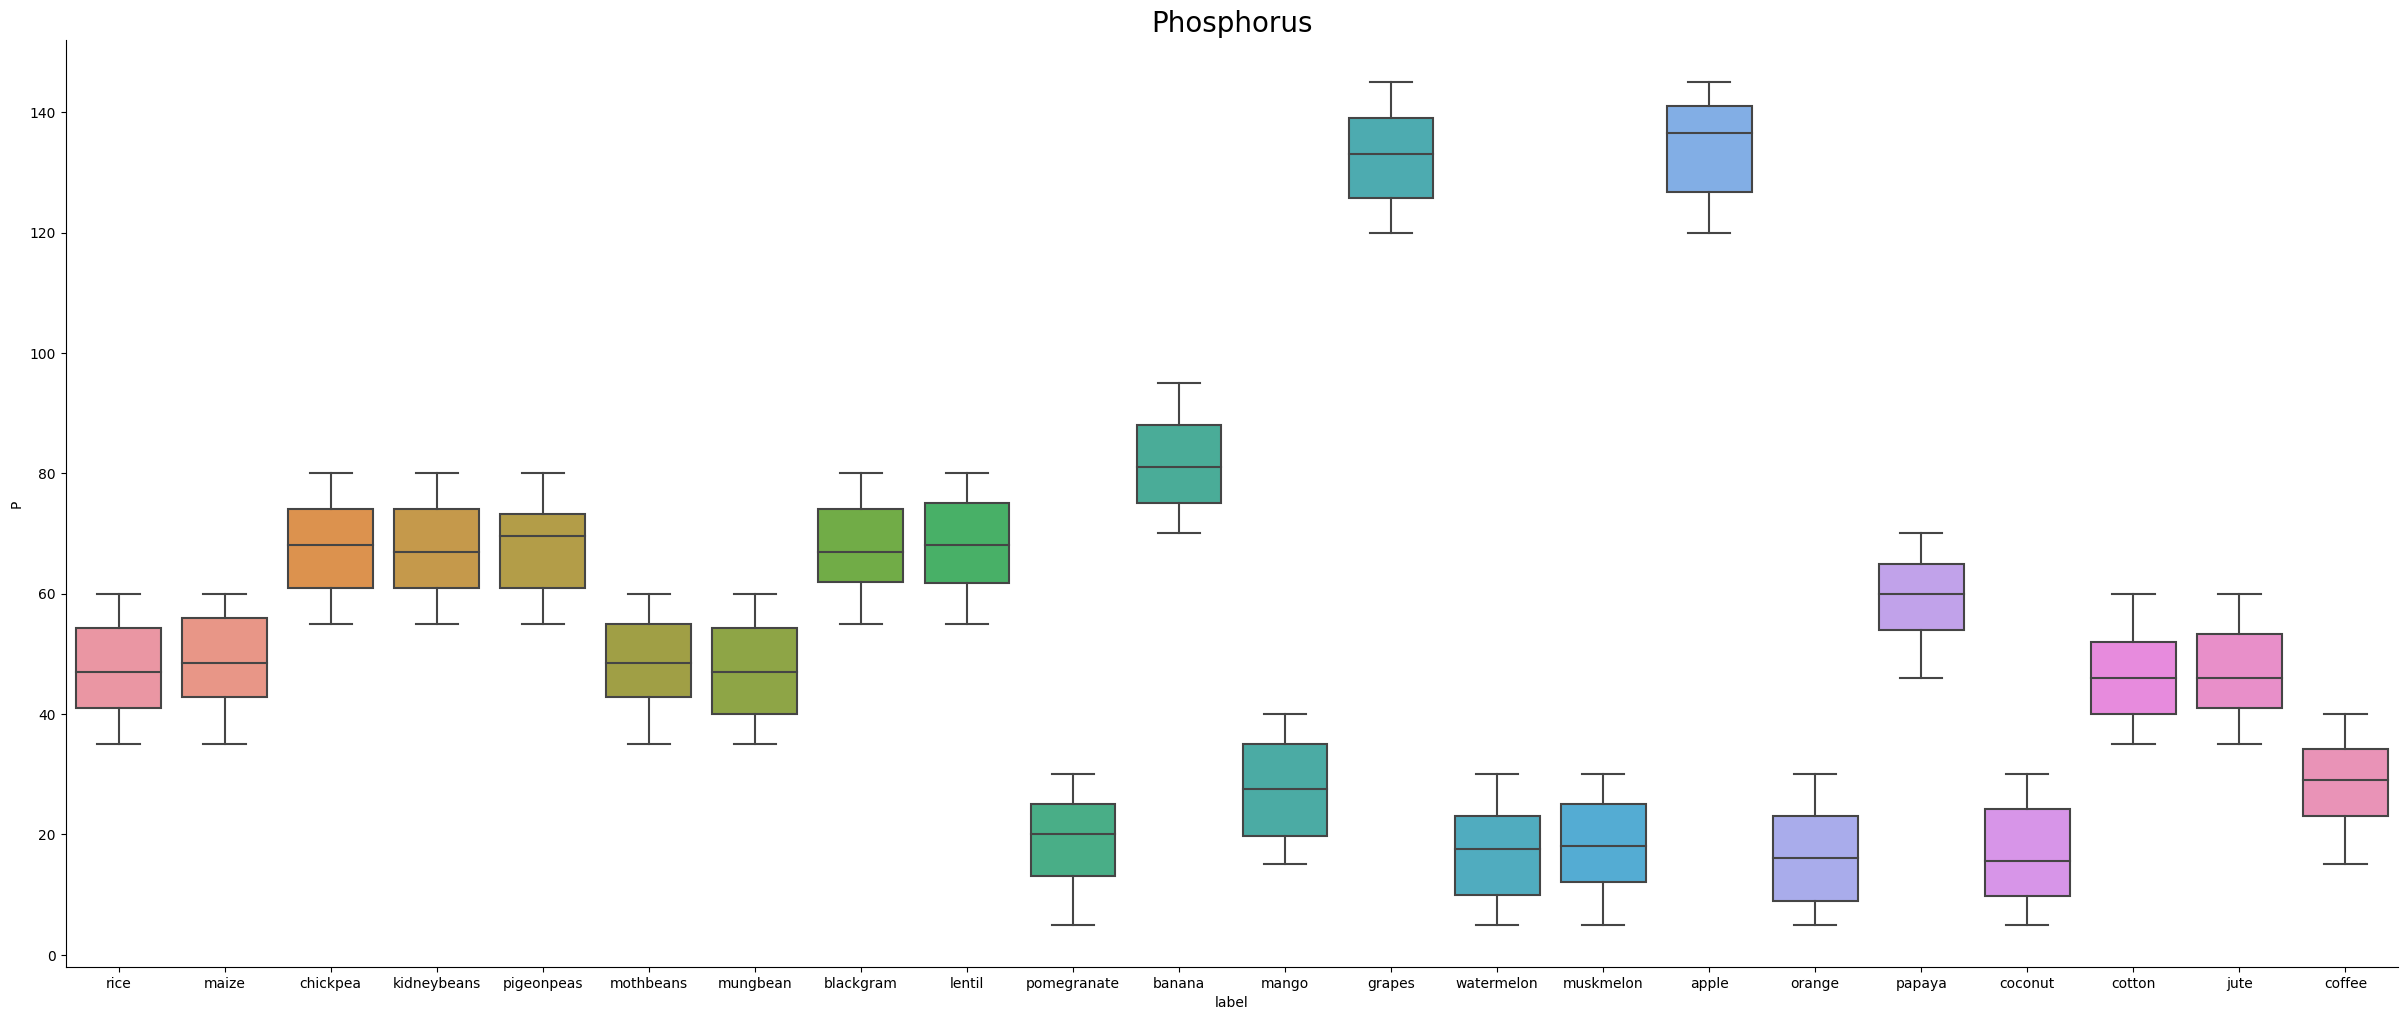

In [18]:
sns.catplot(data=dataset, x='label', y='P', kind='box', height=10, aspect=20/8.27)
# plt.xticks(rotation='vertical')
plt.title("Phosphorus",size=20)
plt.show()

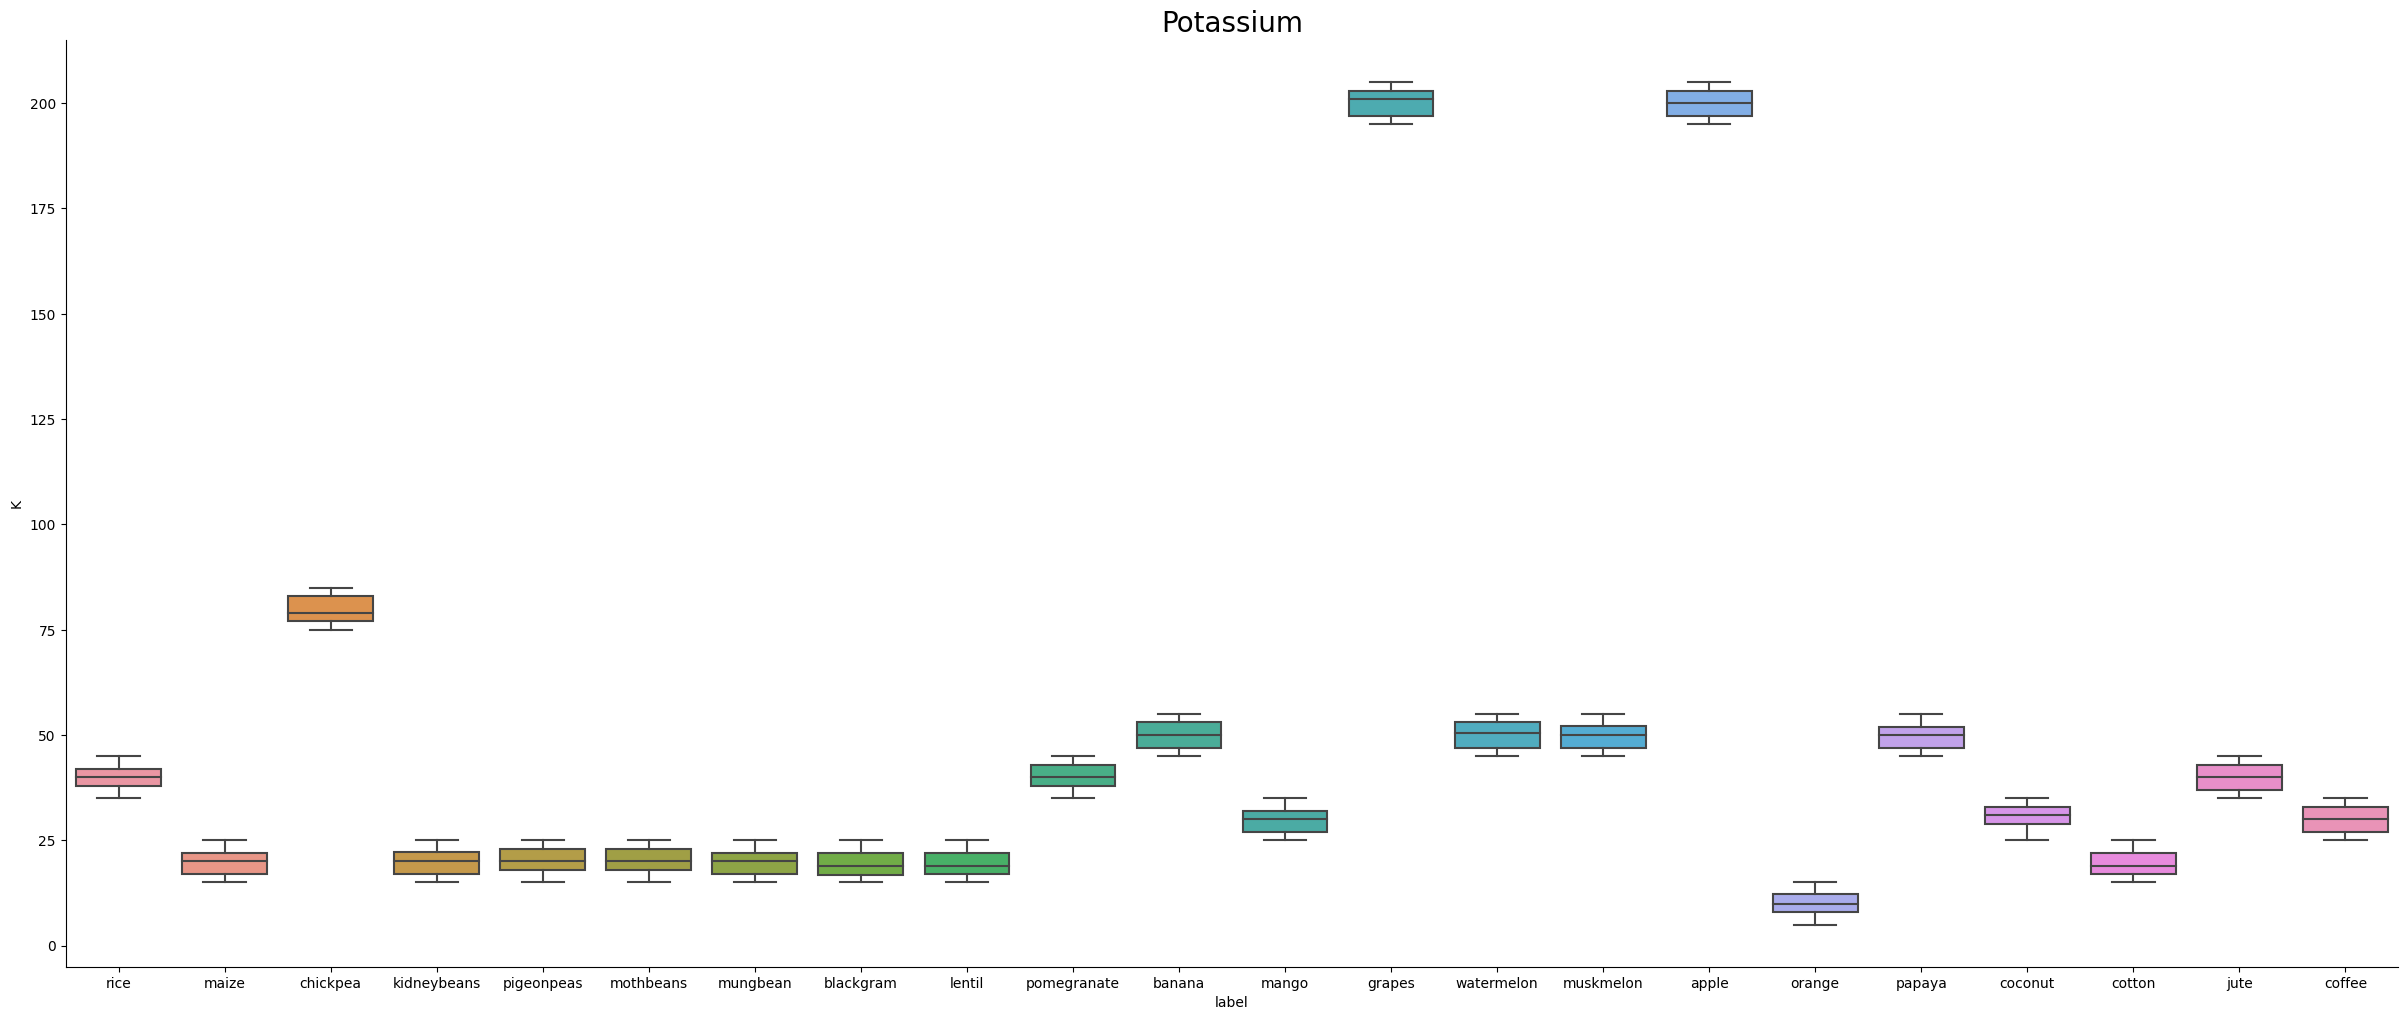

In [19]:
sns.catplot(data=dataset, x='label', y='K', kind='box', height=10, aspect=20/8.27)
# plt.xticks(rotation='vertical')
plt.title("Potassium",size=20)
plt.show()

##  Lets check through Mathematics (Statistics)

In [20]:
def detect_outlier(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (1.5*IQR)
    upper_limit = q3 + (1.5*IQR)
    print(f"Lower limit: {lower_limit} Upper limit: {upper_limit}")
    print(f"Minimum value: {x.min()}   MAximum Value: {x.max()}")
    for i in [x.min(),x.max()]:
        if i == x.min():
            if lower_limit > x.min():
                print("Lower limit failed - Need to remove minimum value")
            elif lower_limit < x.min():
                print("Lower limit passed - No need to remove outlier")
        elif i == x.max():
            if upper_limit > x.max():
                print("Upper limit passed - No need to remove outlier")
            elif upper_limit < x.max():
                print("Upper limit failed - Need to remove maximum value")
detect_outlier(dataset['K'][dataset['label']=='grapes'])

Lower limit: 188.0 Upper limit: 212.0
Minimum value: 195   MAximum Value: 205
Lower limit passed - No need to remove outlier
Upper limit passed - No need to remove outlier


In [21]:
for i in dataset['label'].unique():
    detect_outlier(dataset['K'][dataset['label']==i])
    print('---------------------------------------------')

Lower limit: 32.0 Upper limit: 48.0
Minimum value: 35   MAximum Value: 45
Lower limit passed - No need to remove outlier
Upper limit passed - No need to remove outlier
---------------------------------------------
Lower limit: 9.5 Upper limit: 29.5
Minimum value: 15   MAximum Value: 25
Lower limit passed - No need to remove outlier
Upper limit passed - No need to remove outlier
---------------------------------------------
Lower limit: 68.0 Upper limit: 92.0
Minimum value: 75   MAximum Value: 85
Lower limit passed - No need to remove outlier
Upper limit passed - No need to remove outlier
---------------------------------------------
Lower limit: 9.125 Upper limit: 30.125
Minimum value: 15   MAximum Value: 25
Lower limit passed - No need to remove outlier
Upper limit passed - No need to remove outlier
---------------------------------------------
Lower limit: 10.5 Upper limit: 30.5
Minimum value: 15   MAximum Value: 25
Lower limit passed - No need to remove outlier
Upper limit passed - 

<Axes: >

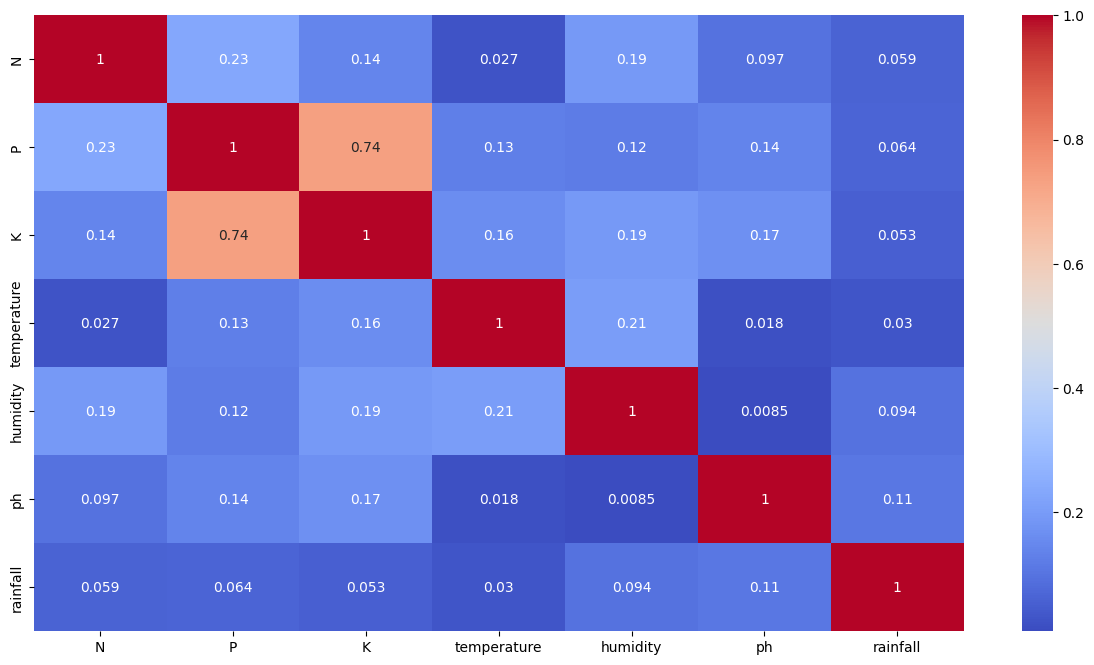

In [22]:
 ## Correlation
plt.figure(figsize=(15,8))
correlation = dataset.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [23]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [24]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['label']]])

,variables,VIF
0,N,3.144079
1,P,9.068963
2,K,5.324539
3,temperature,23.414779
4,humidity,15.070983
5,ph,26.066956
6,rainfall,4.373791


In [25]:
from sklearn import preprocessing
Y = dataset['label']
encode = preprocessing.LabelEncoder()
y = encode.fit_transform(Y)
print("Label length: ",len(y))

Label length:  2200


In [26]:
x = dataset.drop(['label'], axis=1)
x.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [27]:
dha2 =pd.DataFrame(Y)
code = pd.DataFrame(dha2['label'].unique())

In [28]:
dha = pd.DataFrame(y)
encode = pd.DataFrame(dha[0].unique())
refer = pd.DataFrame()
refer['code']=code
refer['encode']=encode
refer

,code,encode
0,rice,20
1,maize,11
2,chickpea,3
3,kidneybeans,9
4,pigeonpeas,18
5,mothbeans,13
6,mungbean,14
7,blackgram,2
8,lentil,10
9,pomegranate,19


## Train ,Test and Cross-Validation Dataset Construction

In [30]:
# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, test_df, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)

In [31]:
print('Number of data points in train data:', train_df.shape[0])
print('Number of data points in test data:', test_df.shape[0])
print('Number of data points in cross validation data:', cv_df.shape[0])

Number of data points in train data: 1408
Number of data points in test data: 440
Number of data points in cross validation data: 352


In [32]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_df= scaler.fit_transform(train_df)
train_df = pd.DataFrame(train_df)
test_df = scaler.transform(test_df)
test_df = pd.DataFrame(test_df)
cv_df = scaler.transform(cv_df)
cv_df = pd.DataFrame(cv_df)




<h2> Prediction using a 'Random' Model</h2>

In [33]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j

    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column

    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1

    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]]

    labels = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]
    # representing A in heatmap format
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    # representing B in heatmap format
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

Log loss on Cross Validation Data using Random Model 3.2929848521064415
Log loss on Test Data using Random Model 3.418166082888493
-------------------- Confusion matrix --------------------


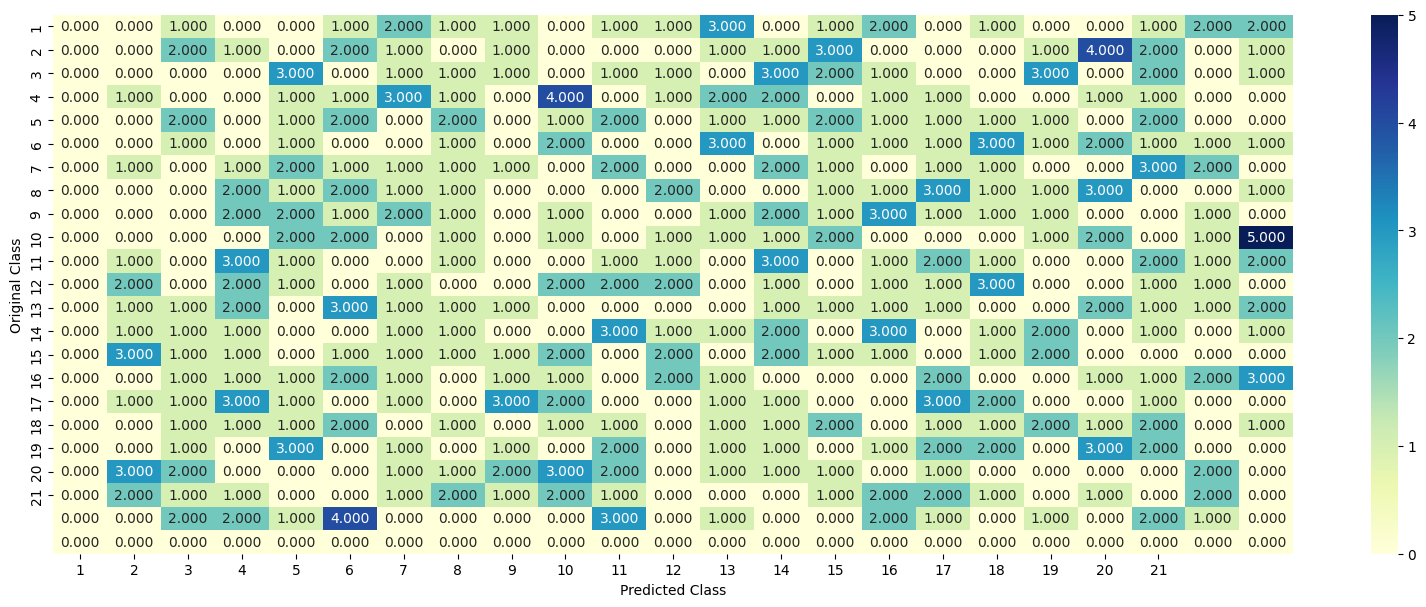

-------------------- Precision matrix (Columm Sum=1) --------------------


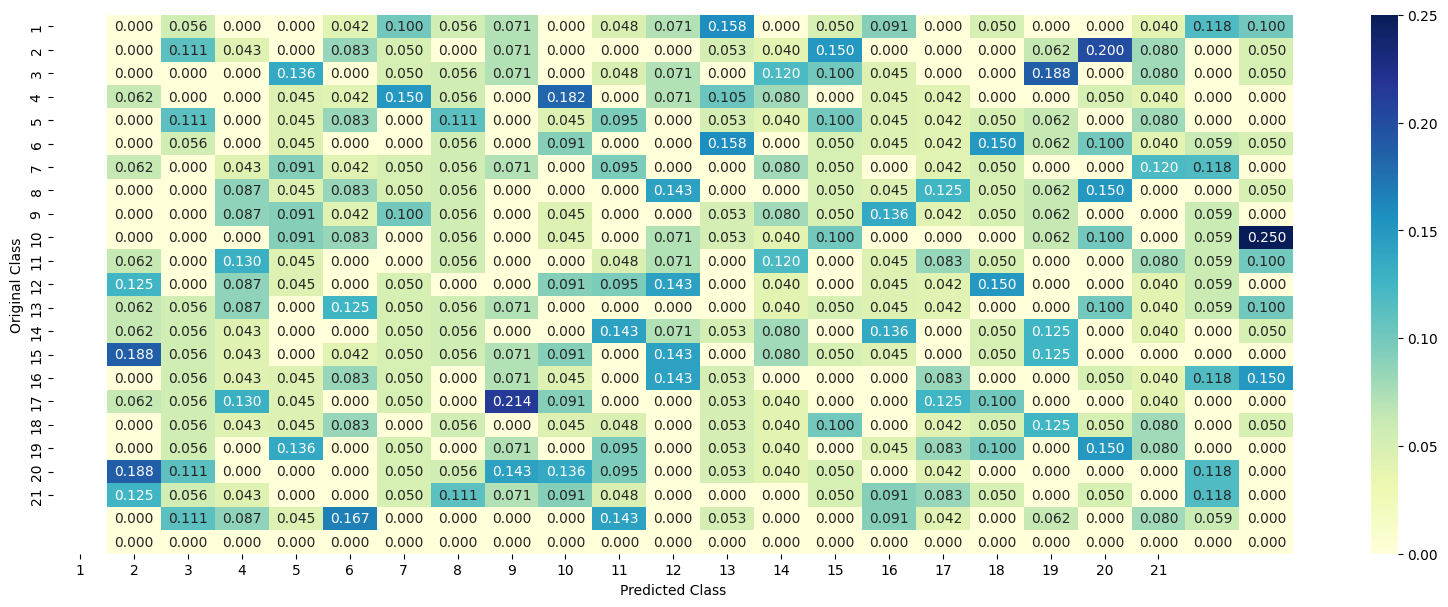

-------------------- Recall matrix (Row sum=1) --------------------


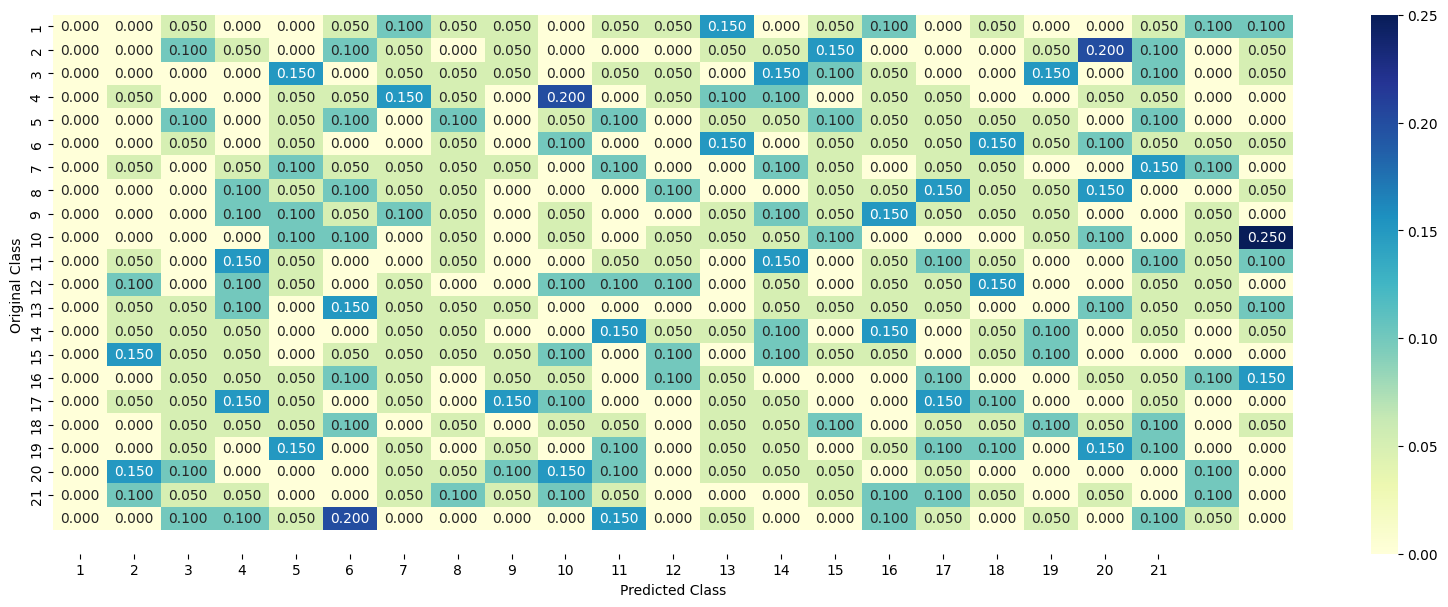

In [34]:
# we need to generate 5 numbers and the sum of numbers should be 1
# one solution is to genarate 5 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039
test_data_len = test_df.shape[0]
cv_data_len = cv_df.shape[0]

# we create a output array that has exactly same size as the CV data
cv_predicted_y = np.zeros((cv_data_len,22))
for i in range(cv_data_len):
    rand_probs = np.random.rand(1,22)
    cv_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Cross Validation Data using Random Model",log_loss(y_cv,cv_predicted_y, eps=1e-15))


# Test-Set error.
#we create a output array that has exactly same as the test data
test_predicted_y = np.zeros((test_data_len,22))
for i in range(test_data_len):
    rand_probs = np.random.rand(1,22)
    test_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test,test_predicted_y, eps=1e-15))

predicted_y =np.argmax(test_predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y+1)

<h1> Machine Learning Models</h1>

In [35]:
#Data preparation for ML models.

#Misc. functionns for ML models


def predict_and_plot_confusion_matrix(train_x, train_y,test_x, test_y, clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    pred_y = sig_clf.predict(test_x)

    # for calculating log_loss we willl provide the array of probabilities belongs to each class
    print("Log loss :",log_loss(test_y, sig_clf.predict_proba(test_x)))
    # calculating the number of data points that are misclassified
    print("Number of mis-classified points :", np.count_nonzero((pred_y- test_y))/test_y.shape[0])
    plot_confusion_matrix(test_y, pred_y)

In [36]:
def report_log_loss(train_x, train_y, test_x, test_y,  clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    sig_clf_probs = sig_clf.predict_proba(test_x)
    return log_loss(test_y, sig_clf_probs, eps=1e-15)

 # K Nearest Neighbour Classification

 <h3> Hyper parameter tuning</h3>

for alpha = 5
Log Loss : 0.16563250626407988
for alpha = 11
Log Loss : 0.1755587451296036
for alpha = 15
Log Loss : 0.18505552218809757
for alpha = 21
Log Loss : 0.19185014944304937
for alpha = 31
Log Loss : 0.19178680743073542
for alpha = 41
Log Loss : 0.20670574222931135
for alpha = 51
Log Loss : 0.23013595611255494
for alpha = 99
Log Loss : 0.4646536557356453


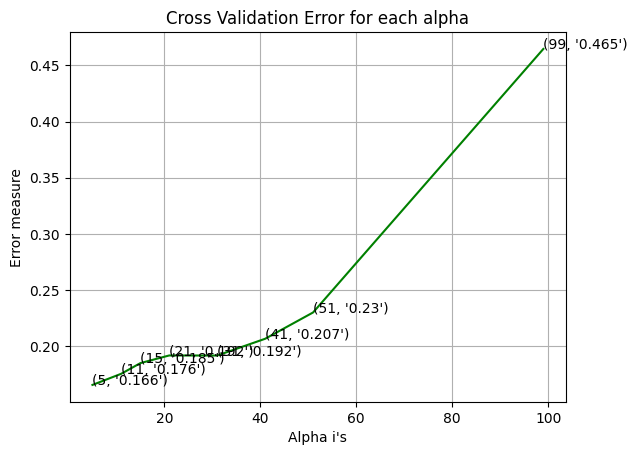

For values of best alpha =  5 The train log loss is: 0.15590305385059122
For values of best alpha =  5 The cross validation log loss is: 0.16563250626407988
For values of best alpha =  5 The test log loss is: 0.19289001262037583


In [37]:

alpha = [5, 11, 15, 21, 31, 41, 51, 99]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(train_df, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_df, y_train)
    sig_clf_probs = sig_clf.predict_proba(cv_df)
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(y_cv, sig_clf_probs))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_df, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_df, y_train)

predict_y = sig_clf.predict_proba(train_df)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_df)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_df)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


Log loss : 0.16563250626407988
Number of mis-classified points : 0.019886363636363636
-------------------- Confusion matrix --------------------


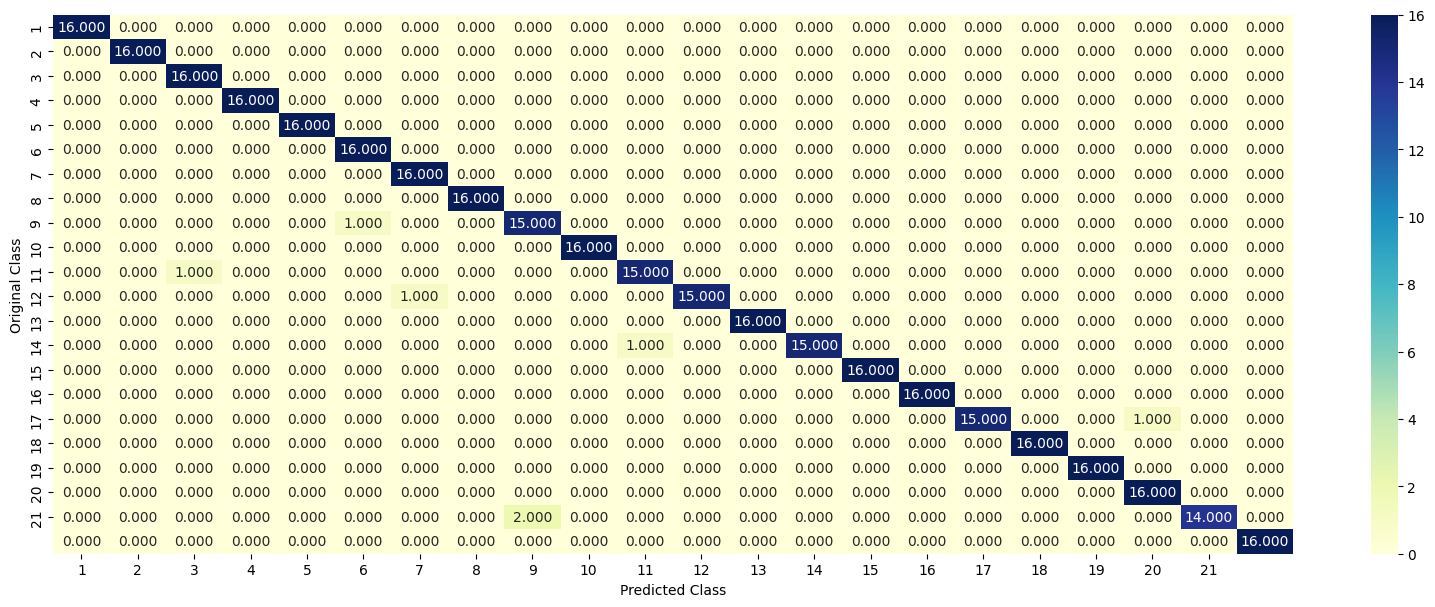

-------------------- Precision matrix (Columm Sum=1) --------------------


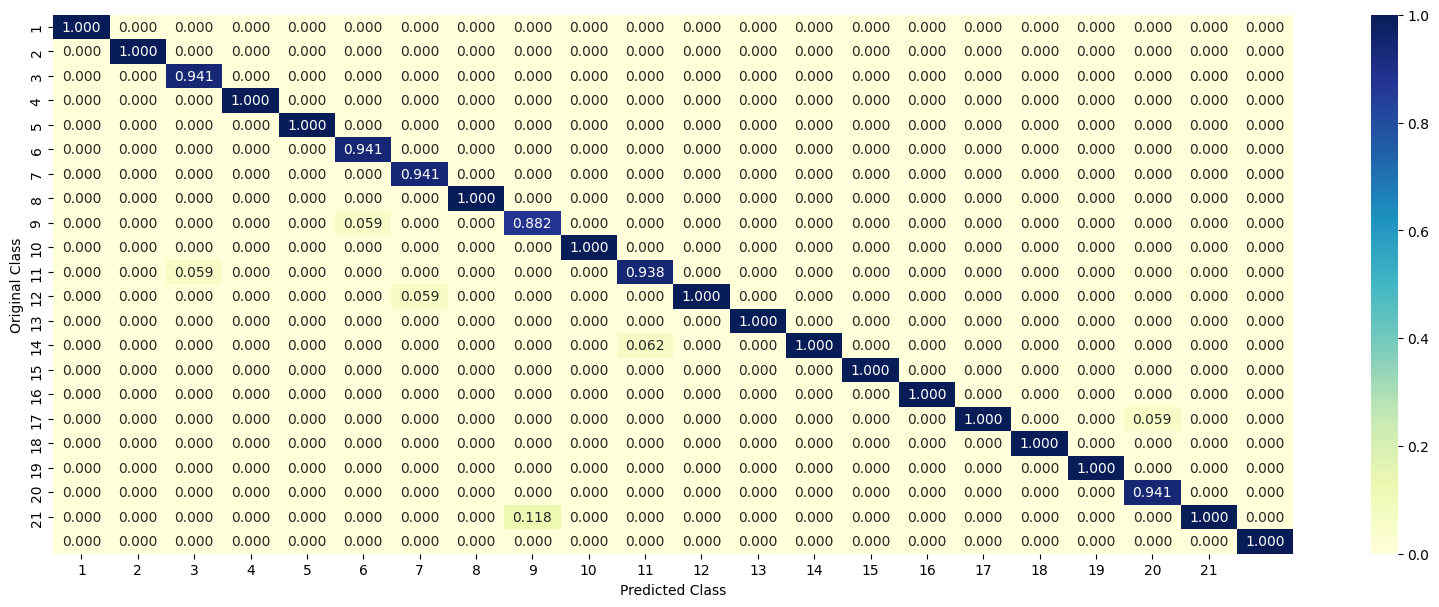

-------------------- Recall matrix (Row sum=1) --------------------


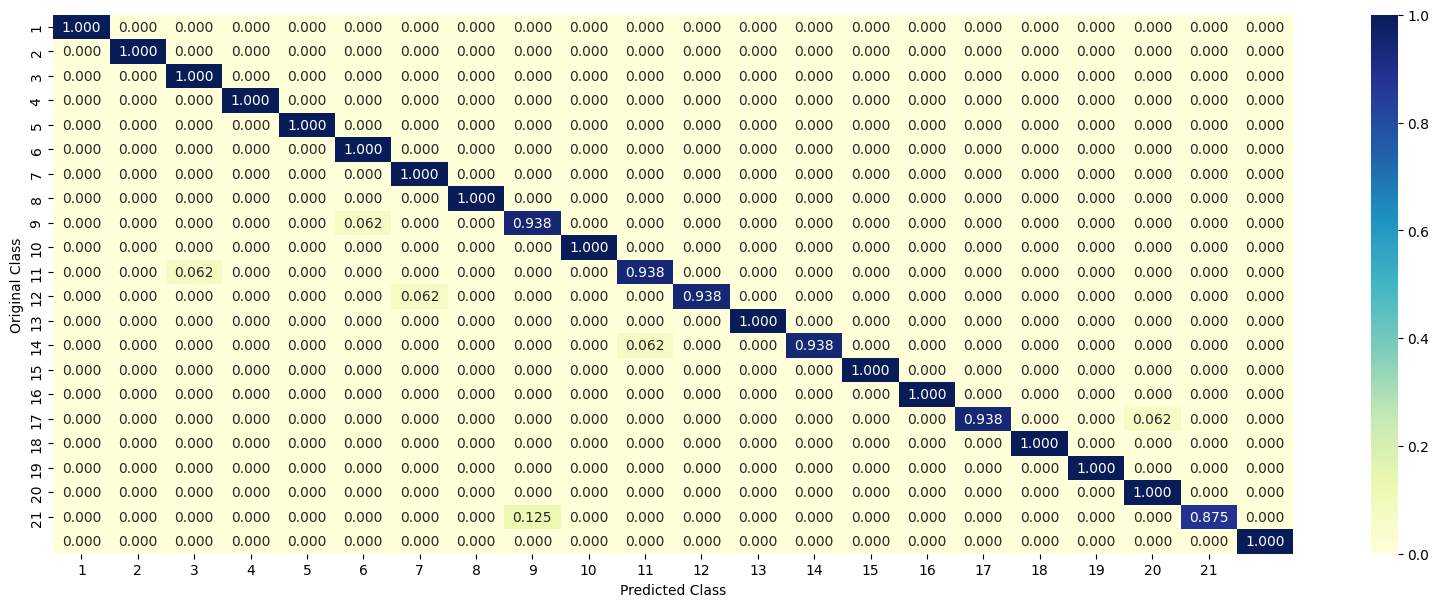

In [38]:
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
predict_and_plot_confusion_matrix(train_df, y_train, cv_df, y_cv, clf)

<h2> Logistic Regression</h2>

<h3> With Class balancing</h3>

<h4>Hyper paramter tuning</h4>

for alpha = 1e-06
Log Loss : 0.6248170845713592
for alpha = 1e-05
Log Loss : 0.5877976208532987
for alpha = 0.0001
Log Loss : 0.5719806411461508
for alpha = 0.001
Log Loss : 0.5674307588245153
for alpha = 0.01
Log Loss : 0.6741074304765399
for alpha = 0.1
Log Loss : 0.8849558655583979
for alpha = 1
Log Loss : 0.9370830473335584
for alpha = 10
Log Loss : 0.9478045947255566
for alpha = 100
Log Loss : 0.9512456599821714


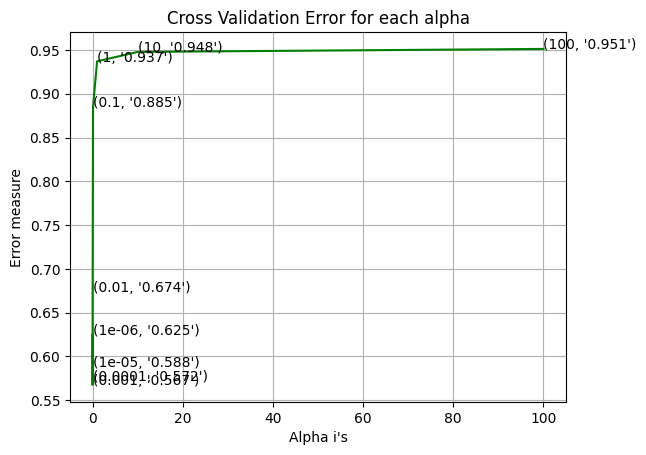

For values of best alpha =  0.001 The train log loss is: 0.5695707261547236
For values of best alpha =  0.001 The cross validation log loss is: 0.5674307588245153
For values of best alpha =  0.001 The test log loss is: 0.5645833077650334


In [39]:
#Logistic Regression
#With Class balancing
#Hyper paramter tuning



alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_df,y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_df, y_train)
    sig_clf_probs = sig_clf.predict_proba(cv_df)
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(y_cv, sig_clf_probs))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_df, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_df, y_train)

predict_y = sig_clf.predict_proba(train_df)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_df)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_df)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

<h3>Testing the model with best hyper paramters</h3>

Log loss : 0.5674307588245153
Number of mis-classified points : 0.03125
-------------------- Confusion matrix --------------------


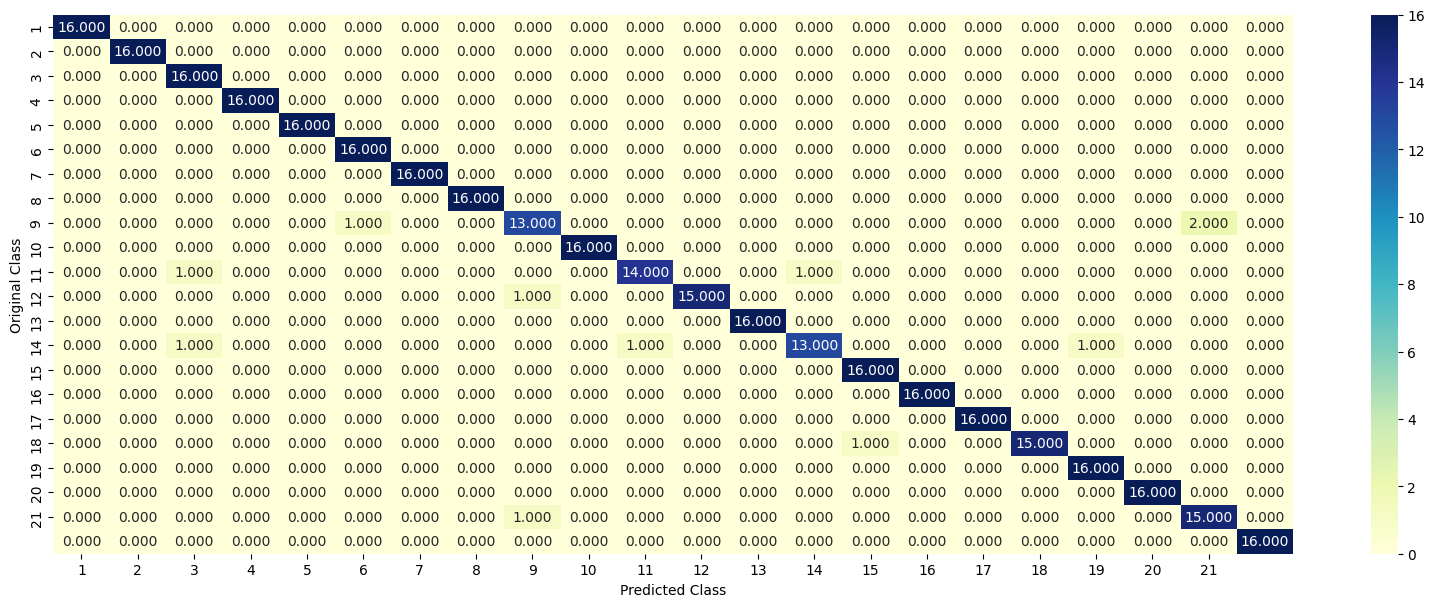

-------------------- Precision matrix (Columm Sum=1) --------------------


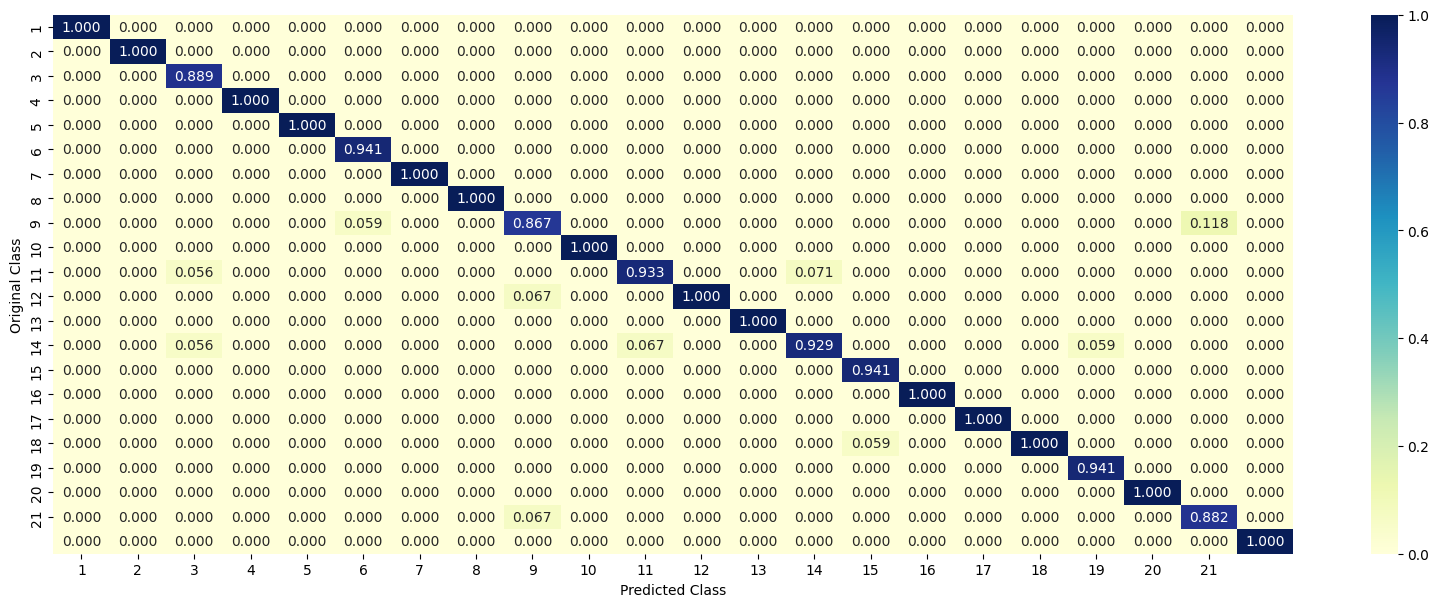

-------------------- Recall matrix (Row sum=1) --------------------


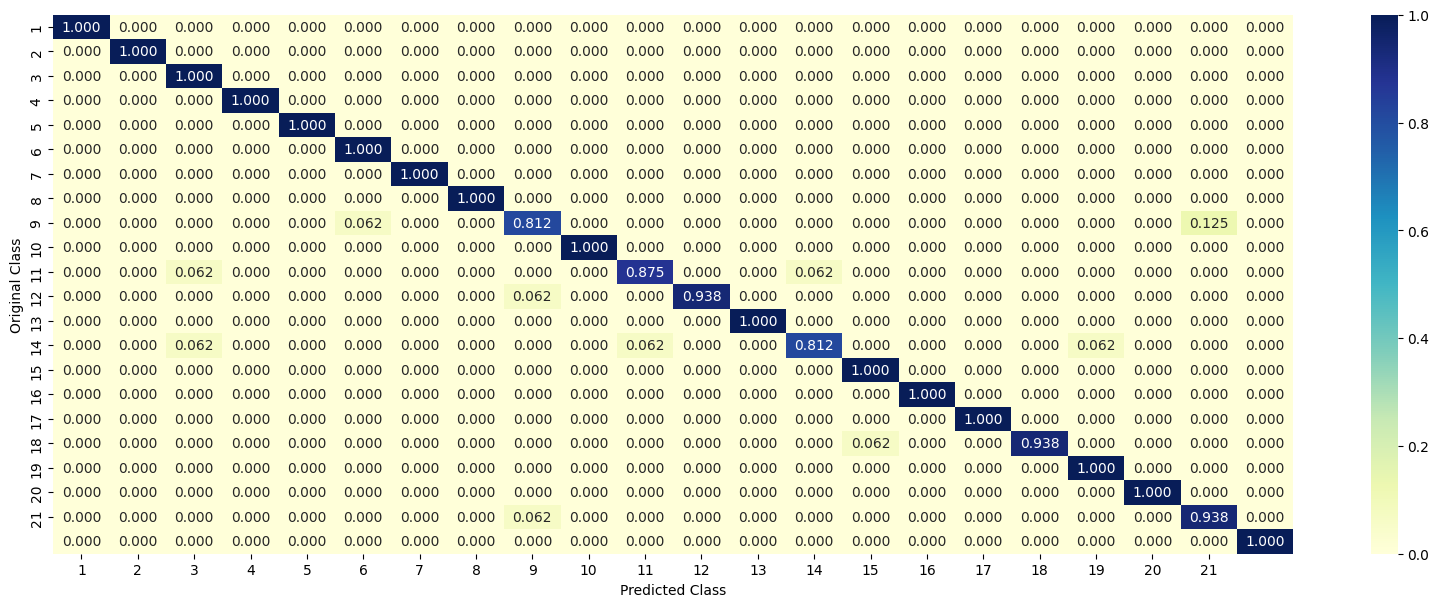

In [40]:
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_df, y_train, cv_df, y_cv, clf)

<h2> Random Forest Classifier</h2>

<h3> Hyper paramter tuning </h3>

In [41]:



alpha = [100,200,500,1000,2000]
max_depth = [5, 10]
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(train_df,y_train)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_df,y_train)
        sig_clf_probs = sig_clf.predict_proba(cv_df)
        cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(y_cv, sig_clf_probs))

'''fig, ax = plt.subplots()
features = np.dot(np.array(alpha)[:,None],np.array(max_depth)[None]).ravel()
ax.plot(features, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[int(i/2)],max_depth[int(i%2)],str(txt)), (features[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()
'''

best_alpha = np.argmin(cv_log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(train_df,y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_df,y_train)

predict_y = sig_clf.predict_proba(train_df)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_df)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_df)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

for n_estimators = 100 and max depth =  5
Log Loss : 0.1601638371044844
for n_estimators = 100 and max depth =  10
Log Loss : 0.1129901146400952
for n_estimators = 200 and max depth =  5
Log Loss : 0.15647469019939306
for n_estimators = 200 and max depth =  10
Log Loss : 0.11070050555081346
for n_estimators = 500 and max depth =  5
Log Loss : 0.1551865328090181
for n_estimators = 500 and max depth =  10
Log Loss : 0.10923212432093847
for n_estimators = 1000 and max depth =  5
Log Loss : 0.15477607902428375
for n_estimators = 1000 and max depth =  10
Log Loss : 0.10865564501221855
for n_estimators = 2000 and max depth =  5
Log Loss : 0.15512309104681982
for n_estimators = 2000 and max depth =  10
Log Loss : 0.1086228075762369
For values of best estimator =  2000 The train log loss is: 0.08817023279254424
For values of best estimator =  2000 The cross validation log loss is: 0.1086228075762369
For values of best estimator =  2000 The test log loss is: 0.09334371997392553


<h3> Testing model with best hyper parameters</h3>

Log loss : 0.1086228075762369
Number of mis-classified points : 0.011363636363636364
-------------------- Confusion matrix --------------------


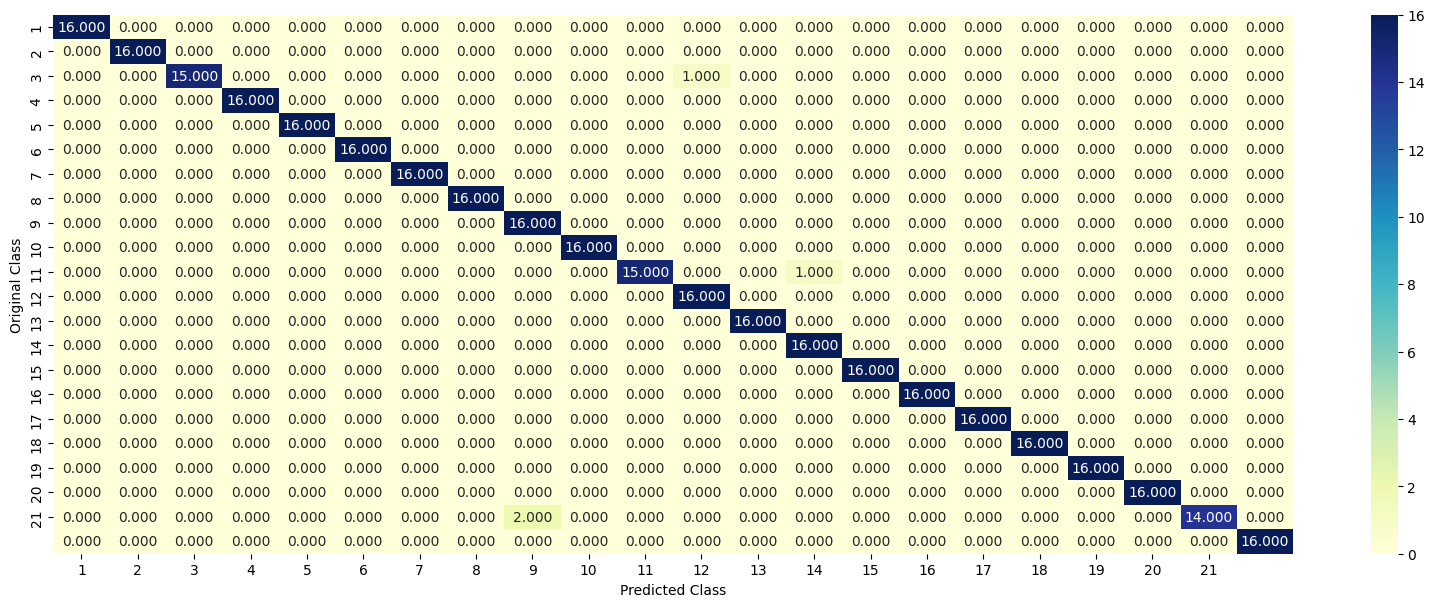

-------------------- Precision matrix (Columm Sum=1) --------------------


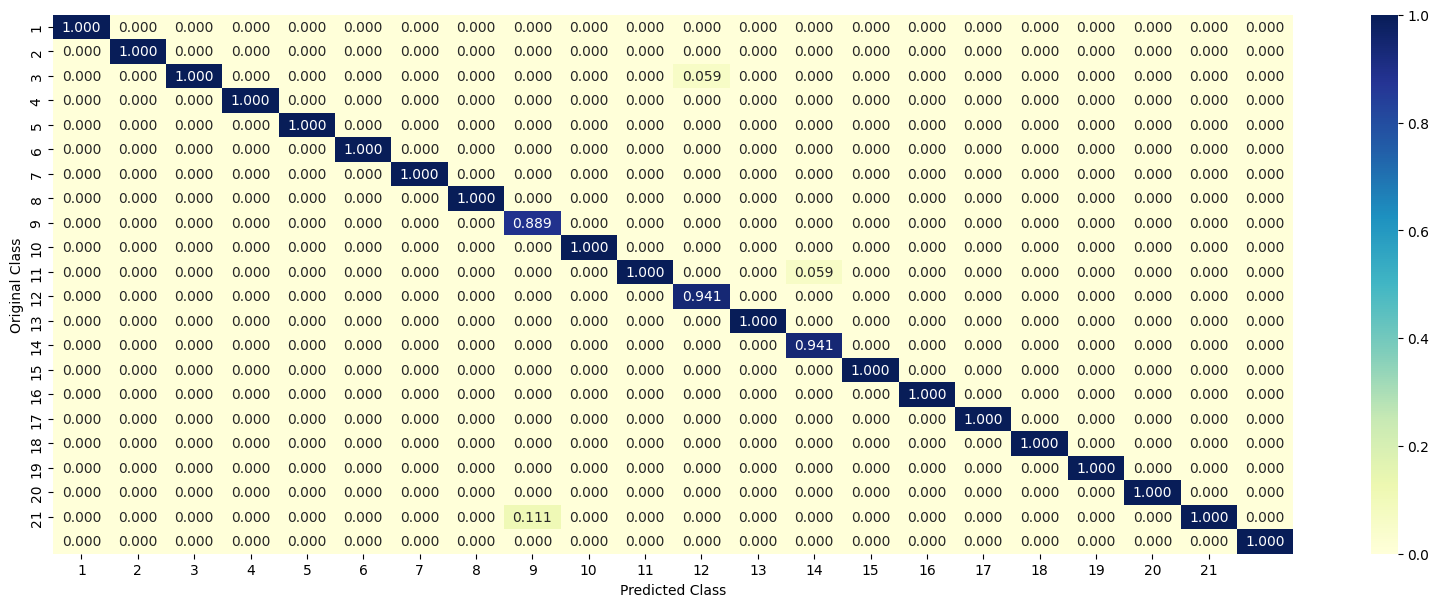

-------------------- Recall matrix (Row sum=1) --------------------


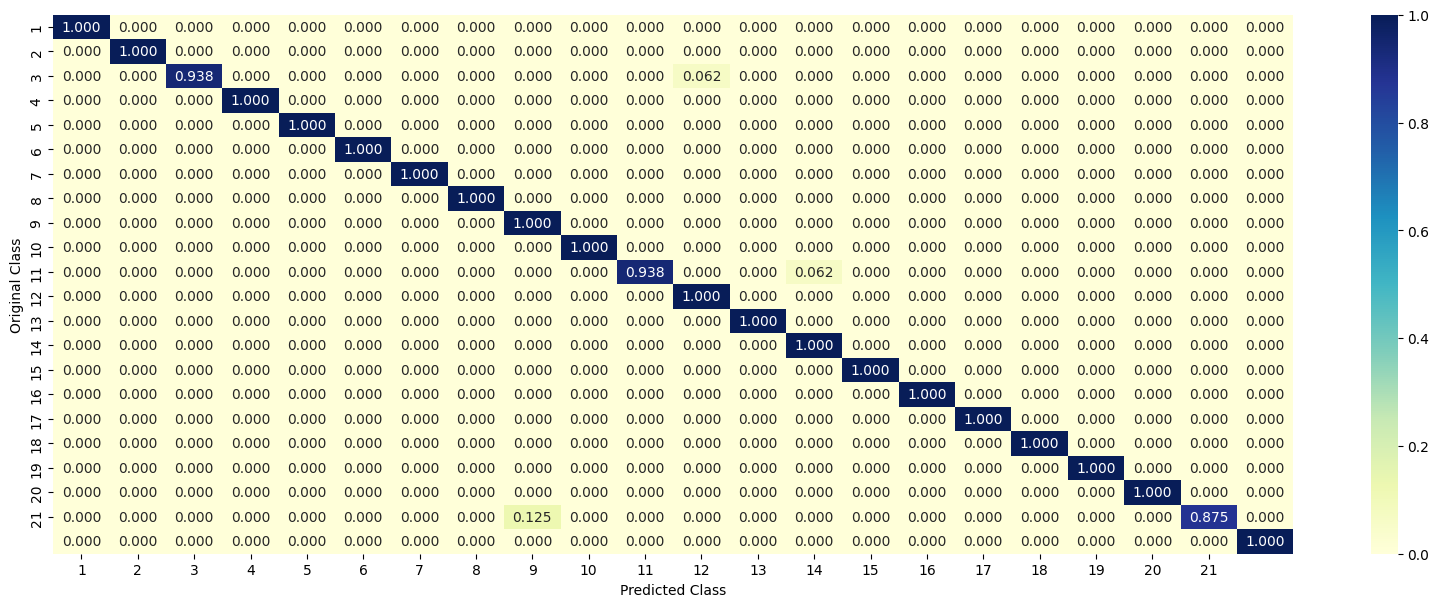

In [42]:
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
# predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y,cv_x_onehotCoding,cv_y, clf)
predict_and_plot_confusion_matrix(train_df, y_train, cv_df, y_cv, clf)

##Conclusions:
1. Among 3 ML Models , Random Forest is the best ML Model for our task.
2. Train and test performance of Model can be furthur improved by using Deep Learning models ,However at the Cost of computational expense.

In [43]:
import pickle
pickle.dump(sig_clf, open('/content/drive/MyDrive/final_prediction.pickle', 'wb'))
pickle.dump(scaler, open('/content/drive/MyDrive/scaler.pickle', 'wb'))